In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
from utils import clustering, parse_to_ES, processing, convert_response_to_df
from esclient import _get_client

In [3]:
def pipeline(nl):
    cluster = clustering(nl)
    body = parse_to_ES(cluster)
    es = _get_client()
    response = es.search(index='real_estate', body=body)
    # them phan preprocessing vao day de tra ve ketqua
    # hien tai de trong de debug
    return cluster, body, response


In [92]:
# la ham processing tra ve kq 
# opened to play with df
def processing_test(response, cluster):
    if cluster['intent'] == 'query':
        result = {}
        agg = response['aggregations']
        
        result['total'] = response['hits']['total']
        result['min'] = agg['min']['value']
        result['max'] = agg['max']['value']
        result['avg'] = agg['avg']['value']
        
        return result
    elif cluster['intent'] == 'groupby':
        
        df = convert_response_to_df(response)
        obj = cluster['Object']
        groupby = cluster['groupby']
        x = df.groupby([groupby], as_index=False).mean()
        x_a = list(x[groupby])
        y_a = list(x[obj])
        plt.figure(figsize=(25, 25))
        plt.plot(x_a, y_a)
        return df, obj, groupby

In [90]:
txts = ['draw the price chart of Apartment in SaiGon, according district',
       'tell me the avg price Landhouse with 2 rooms in HaNoi']

In [91]:
cluster, body, response = pipeline(txts[1])

{
    "text": "tell me the avg price Landhouse with 2 rooms in HaNoi",
    "intents": [
        {
            "id": "953447095491177",
            "name": "query",
            "confidence": 1
        }
    ],
    "entities": {
        "normed_province:normed_province": [
            {
                "id": "597825701265414",
                "name": "normed_province",
                "role": "normed_province",
                "start": 48,
                "end": 53,
                "body": "HaNoi",
                "confidence": 0.9841,
                "entities": [],
                "value": "Hà Nội",
                "type": "value"
            }
        ],
        "Object:Object": [
            {
                "id": "1008788833198973",
                "name": "Object",
                "role": "Object",
                "start": 39,
                "end": 44,
                "body": "rooms",
                "confidence": 1,
                "entities": [],
                "value": "bedro

In [93]:
modifier(response, cluster)

{'total': 697008,
 'min': 0.0,
 'max': 255999998951424.0,
 'avg': 795437713.4692054}

In [94]:
cluster, body, response = pipeline(txts[0])

{
    "text": "draw the price chart of Apartment in SaiGon, according district",
    "intents": [
        {
            "id": "353178916316175",
            "name": "groupby",
            "confidence": 0.9998
        }
    ],
    "entities": {
        "Object:groupby": [
            {
                "id": "4068291899952567",
                "name": "Object",
                "role": "groupby",
                "start": 55,
                "end": 63,
                "body": "district",
                "confidence": 0.8653,
                "entities": [],
                "value": "normed_district",
                "type": "value"
            }
        ],
        "normed_province:normed_province": [
            {
                "id": "597825701265414",
                "name": "normed_province",
                "role": "normed_province",
                "start": 37,
                "end": 43,
                "body": "SaiGon",
                "confidence": 0.96,
                "entities": 

(                  id ad_vip_type   area area_unit  bedroom           category  \
 0        pz_pr297573      Thường   83.0        m2      3.0    Chung cư/Căn hộ   
 1        pz_pr220890      Thường  103.0        m2      3.0    Chung cư/Căn hộ   
 2     alnd_pr7913109      normal   30.0        m2      1.0  Cho thuê chung cư   
 3     alnd_pr7697764      normal   32.0        m2      1.0  Cho thuê chung cư   
 4     alnd_pr7914347      normal   30.0        m2      1.0  Cho thuê chung cư   
 ...              ...         ...    ...       ...      ...                ...   
 9995   mg_pr21221484          up   40.0       NaN      1.0    Cho thuê Căn hộ   
 9996   mg_pr21260991       basic   45.0       NaN      1.0    Cho thuê Căn hộ   
 9997   mg_pr21059935       basic   70.0       NaN      1.0    Cho thuê Căn hộ   
 9998   mg_pr21065103       basic   35.0       NaN      1.0    Cho thuê Căn hộ   
 9999   mg_pr21065067       basic   35.0       NaN      1.0    Cho thuê Căn hộ   
 
      currency

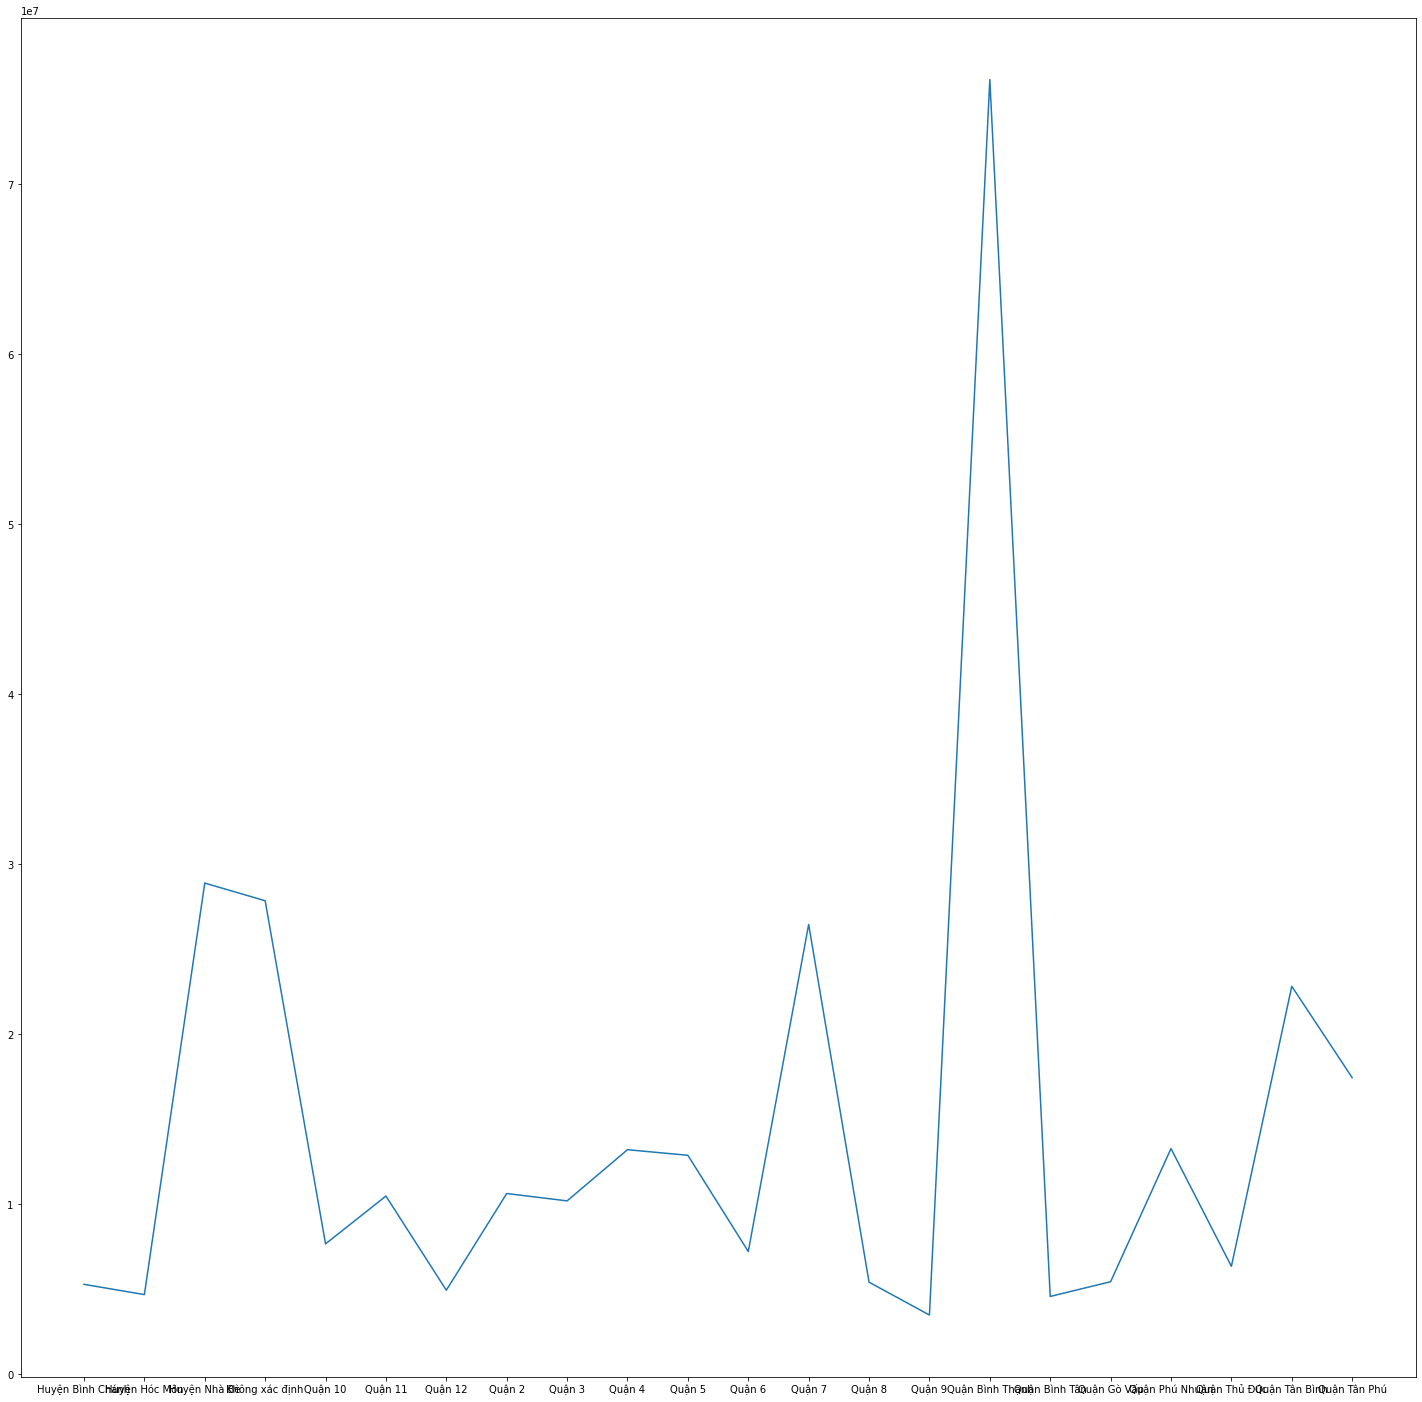

In [95]:
modifier(response, cluster)